In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from core.clustering import pca, plot_pca_grid
from core.semcor_bert_pipeline import load_data
from sklearn.decomposition import PCA

In [2]:
perf_data = pd.read_csv('../data/model_perf.csv')

In [3]:
words = perf_data['Lemma']
pca_data = []

In [4]:
for w in words:
    word, pos = w.split(".")
    data = load_data(word, pos, 'semcor')
    e = data['embeddings']
    for n in np.arange(2, 11):
        var = pca(e, n)
        pca_data.append({'type': w, 'n_pcs': n, 'pct_var_explained': var})

In [5]:
pc_variances = pd.DataFrame(pca_data)
df = pc_variances.merge(perf_data, left_on = 'type', right_on = 'Lemma')

In [24]:
def plot_pca_grid(df, compare_column, fit_line = False):
    fig = plt.figure(figsize = (10, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    linear_model = LinearRegression()
    for i in range(1, 10):
        ax = fig.add_subplot(3, 3, i)
        pcs = i + 1
        with_pcs = df[df['n_pcs'] == pcs]
        x = with_pcs[compare_column]
        y = with_pcs['pct_var_explained']
        ax.scatter(x, y, alpha = 0.5)
        if fit_line:
            x = x.values.reshape(-1, 1)
            linear_model.fit(x, y)
            y_pred = linear_model.predict(x)
            ax.plot(x, y_pred, color = 'red')
        ax.title.set_text(str(pcs) + " PCs")
    plt.suptitle(compare_column + " vs. % Variance Explained")


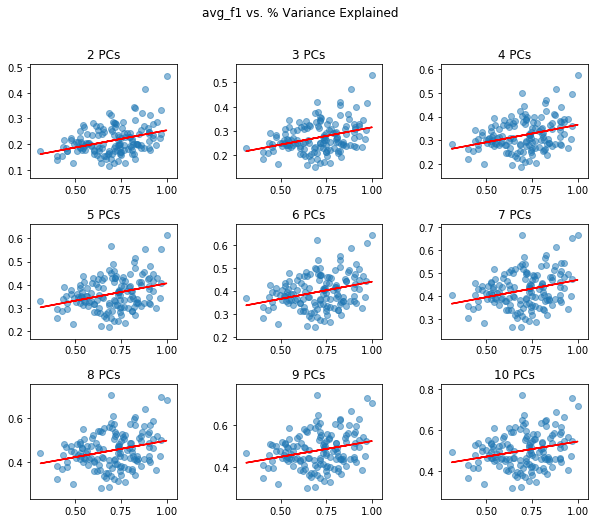

In [25]:
plot_pca_grid(df, 'avg_f1', fit_line = True)

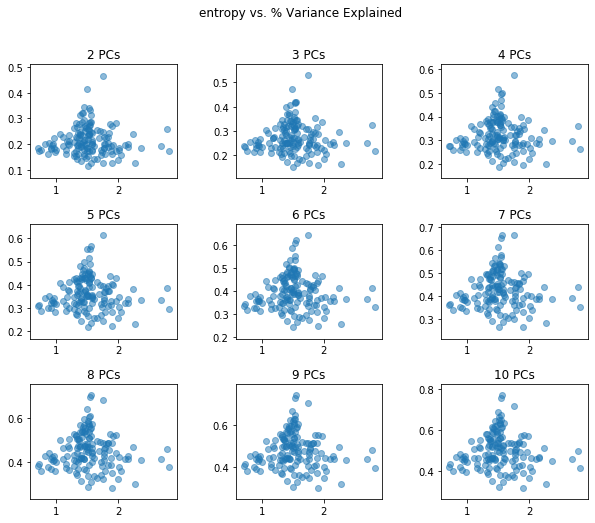

In [7]:
plot_pca_grid(df, 'entropy')

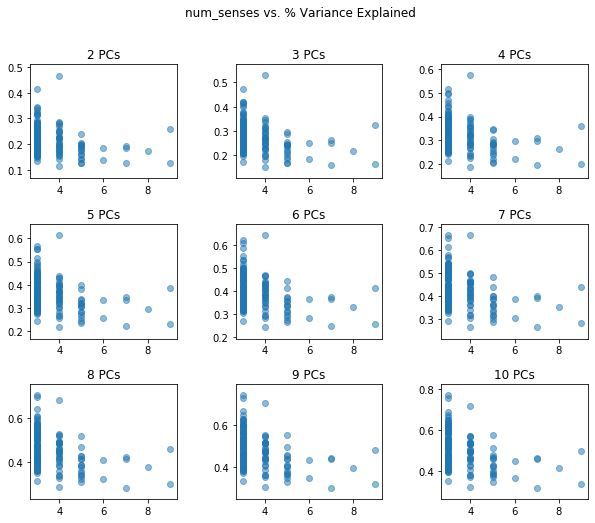

In [8]:
plot_pca_grid(df, 'num_senses')